In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
with open('C:\sample_intern\wallet_credit_scores.json', 'r') as f:
    warnings.filterwarnings('ignore')
    data = json.load(f)


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\jk913\AppData\Local\Temp\ipykernel_7928\1852953580.py:6: SyntaxWarning: invalid escape sequence '\s'
  with open('C:\sample_intern\wallet_credit_scores.json', 'r') as f:


In [4]:
df = pd.DataFrame(data)

In [5]:
bins = list(range(0, 1100, 100))
labels = [f"{i}-{i+99}" for i in bins[:-1]]

df['rb_score_range'] = pd.cut(df['rule_based_score'], bins=bins, labels=labels, include_lowest=True)
df['ml_score_range'] = pd.cut(df['credit_score'], bins=bins, labels=labels, include_lowest=True)

rb_counts = df['rb_score_range'].value_counts().sort_index()
ml_counts = df['ml_score_range'].value_counts().sort_index()


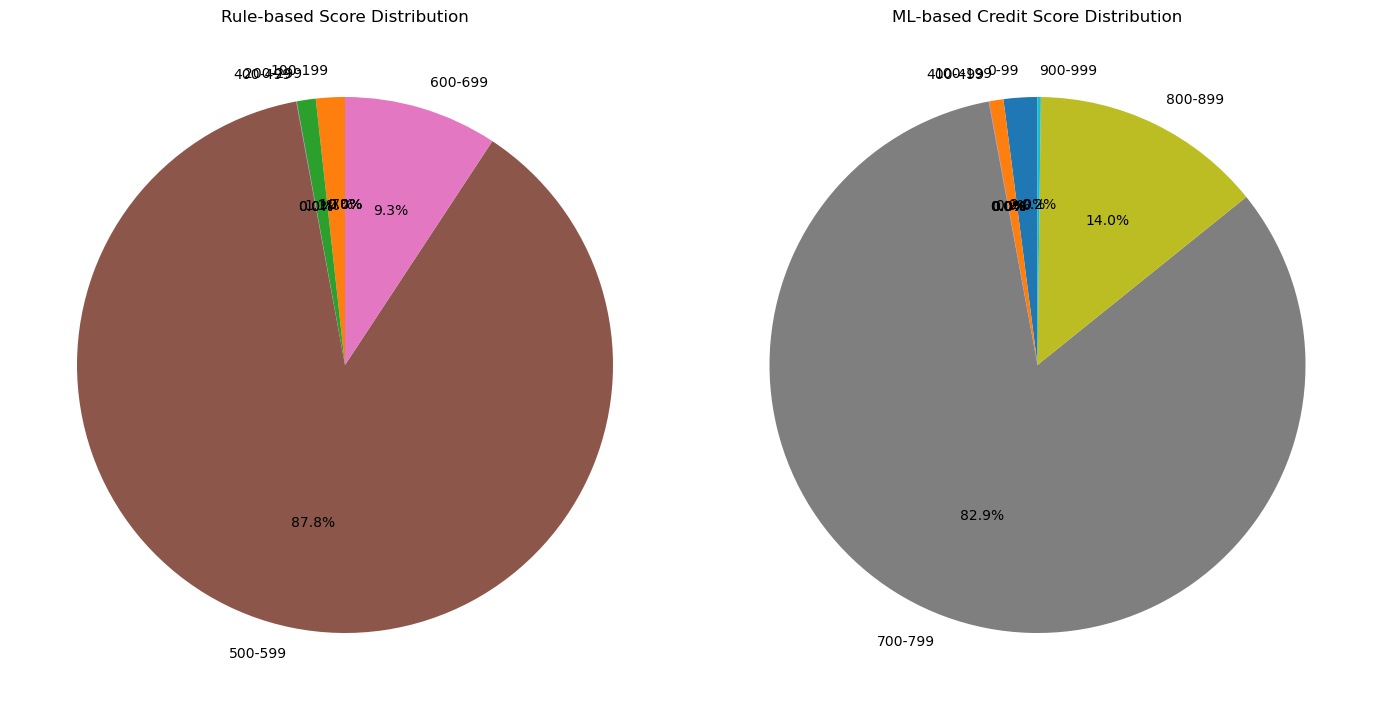

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

rb_counts.plot.pie(ax=ax[0], autopct='%1.1f%%', startangle=90, title='Rule-based Score Distribution', colormap='tab10')
ax[0].set_ylabel('')
ml_counts.plot.pie(ax=ax[1], autopct='%1.1f%%', startangle=90, title='ML-based Credit Score Distribution', colormap='tab10')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

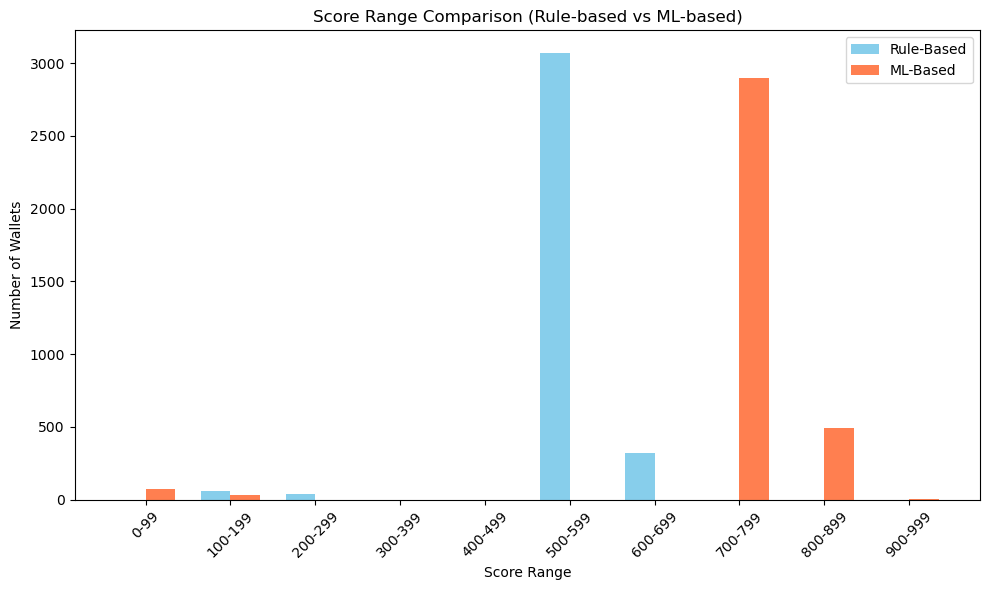

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35
x = range(len(labels))

ax.bar(x, rb_counts.values, width=width, label='Rule-Based', color='skyblue')
ax.bar([i + width for i in x], ml_counts.values, width=width, label='ML-Based', color='coral')

ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.set_xlabel('Score Range')
ax.set_ylabel('Number of Wallets')
ax.set_title('Score Range Comparison (Rule-based vs ML-based)')
ax.legend()
plt.tight_layout()
plt.show()

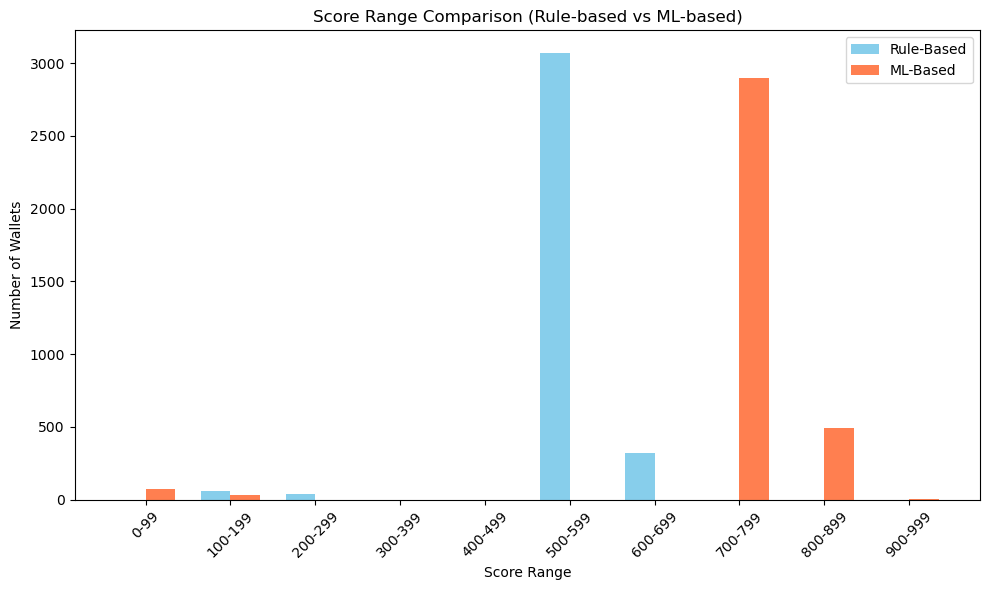

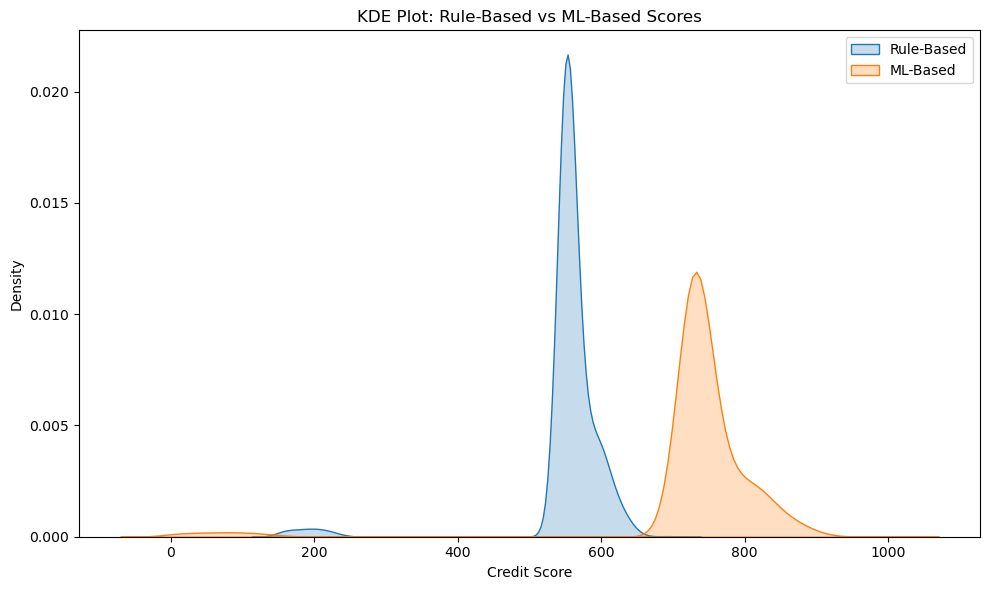

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['rule_based_score'], label='Rule-Based', fill=True)
sns.kdeplot(df['credit_score'], label='ML-Based', fill=True)
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('KDE Plot: Rule-Based vs ML-Based Scores')
plt.legend()
plt.tight_layout()
plt.show()

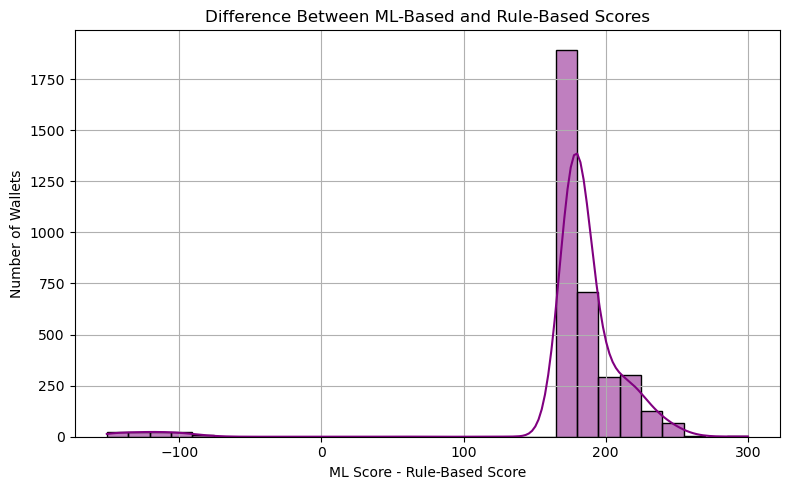

count    3497.000000
mean      179.071204
std        54.591475
min      -151.000000
25%       177.000000
50%       177.000000
75%       191.000000
max       300.000000
Name: score_diff, dtype: float64


In [10]:
df['score_diff'] = df['credit_score'] - df['rule_based_score']
plt.figure(figsize=(8, 5))
sns.histplot(df['score_diff'], bins=30, kde=True, color='purple')
plt.title('Difference Between ML-Based and Rule-Based Scores')
plt.xlabel('ML Score - Rule-Based Score')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print some stats
print(df['score_diff'].describe())


In [23]:
def categorize_user(score):
    if score >= 800:
        return 'Highly Reliable'
    elif score >= 650:
        return 'Reliable'
    else:
        return 'Risky / Bot-like'
df['user_behavior'] = df['credit_score'].apply(categorize_user)

In [24]:
behavior_counts = df['user_behavior'].value_counts()
print(behavior_counts)


user_behavior
Reliable            2895
Highly Reliable      500
Risky / Bot-like     102
Name: count, dtype: int64


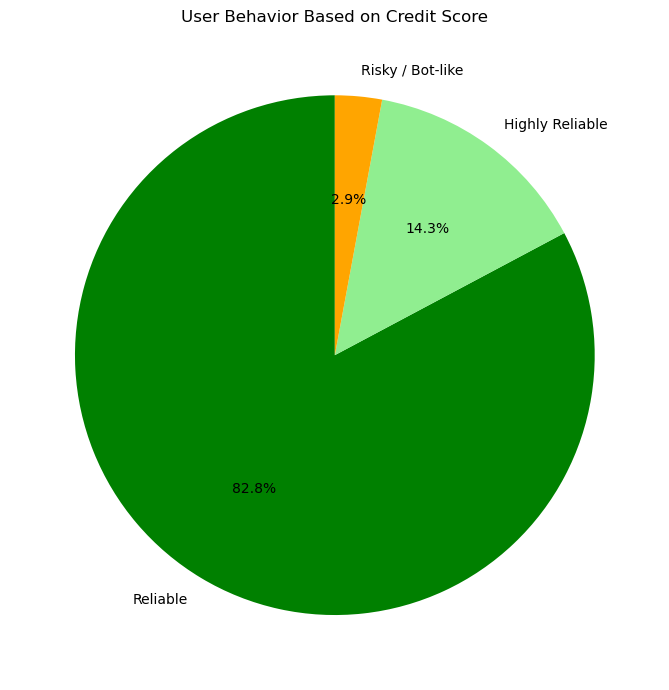

In [25]:
plt.figure(figsize=(7,7))
behavior_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'lightgreen', 'orange', 'red'])
plt.title('User Behavior Based on Credit Score')
plt.ylabel('')
plt.tight_layout()
plt.show()


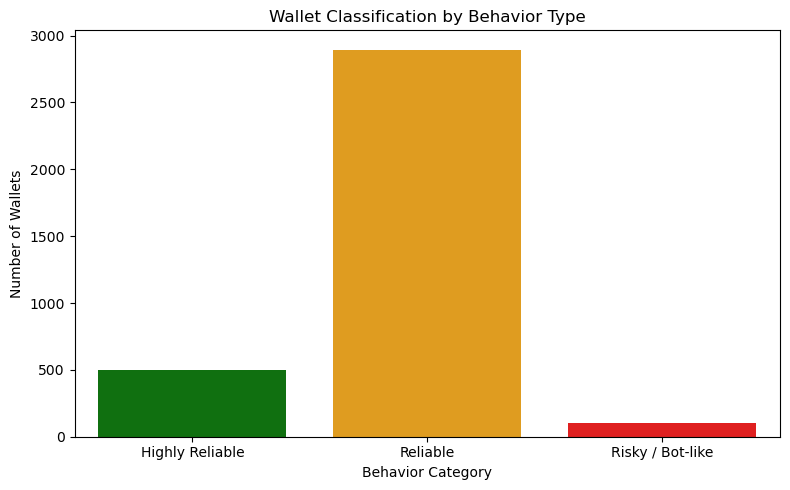

In [26]:
plt.figure(figsize=(8, 5))
sns.countplot(x='user_behavior', data=df, order=['Highly Reliable', 'Reliable', 'Risky / Bot-like'],
              palette=['green', 'orange', 'red'])
plt.title('Wallet Classification by Behavior Type')
plt.xlabel('Behavior Category')
plt.ylabel('Number of Wallets')
plt.tight_layout()
plt.show()


In [27]:
df['rule_behavior'] = df['rule_based_score'].apply(categorize_user)

# Create crosstab
crosstab = pd.crosstab(df['user_behavior'], df['rule_behavior'], rownames=['ML'], colnames=['Rule-Based'], margins=True)
print("Confusion Matrix Between ML and Rule-Based Classifications:")
print(crosstab)


Confusion Matrix Between ML and Rule-Based Classifications:
Rule-Based        Reliable  Risky / Bot-like   All
ML                                                
Highly Reliable          6               494   500
Reliable                 0              2895  2895
Risky / Bot-like         0               102   102
All                      6              3491  3497
